In [3]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights',
 'RegNet_X_1_6GF_Weights',
 'R

In [10]:
alexnet = models.AlexNet()
resnet = models.resnet101(weights=True)

In [11]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]
    )
])

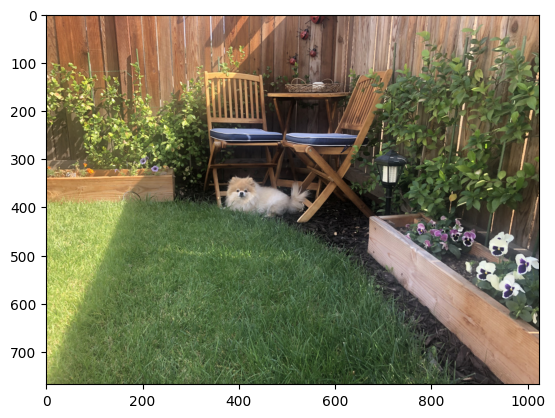

In [14]:
from PIL import Image
img1 = Image.open('./candy.jpeg')

from matplotlib import pyplot as plt
plt.imshow(img1)

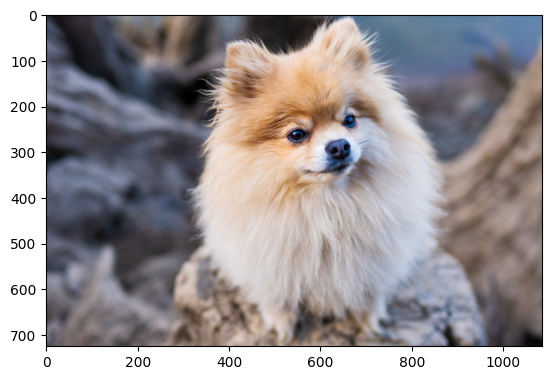

In [16]:
img2 = Image.open('./candy2.jpeg')
plt.imshow(img2)

In [24]:
img1_t = preprocess(img1)
img2_t = preprocess(img2)
img2_t.size()

torch.Size([3, 224, 224])

In [30]:
import torch
batch1_t = torch.unsqueeze(img1_t, 0)
batch2_t = torch.unsqueeze(img2_t, 0)
batch2_t.size()

torch.Size([1, 3, 224, 224])

In [36]:
resnet.eval()
out1 = resnet(batch1_t)
out2 = resnet(batch2_t)
out2.size()

torch.Size([1, 1000])

In [41]:
with open('./imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
len(labels)

1000

In [48]:
_, index1 = torch.max(out1, 1)
_, index2 = torch.max(out2, 1)
print(labels[index1[0]])
print(labels[index2[0]])

Samoyed, Samoyede
Pomeranian


In [57]:
percentage1 = torch.nn.functional.softmax(out1, dim=1)[0] * 100
labels[index1[0]], percentage1[index1[0]].item()

('Samoyed, Samoyede', 73.29438018798828)

In [61]:
percentage2 = torch.nn.functional.softmax(out2, dim=1)[0] * 100
labels[index2[0]], percentage2[index2[0]].item()

('Pomeranian', 99.71422576904297)

In [69]:
_, indexes1 = torch.sort(out1, descending = True)
[(labels[i], percentage1[i].item()) for i in indexes1[0][:10]]

[('Samoyed, Samoyede', 73.29438018798828),
 ('patio, terrace', 11.833355903625488),
 ('Great Pyrenees', 3.770017147064209),
 ('Pomeranian', 3.333940029144287),
 ('Angora, Angora rabbit', 2.801943302154541),
 ('Persian cat', 1.3882601261138916),
 ('kuvasz', 0.6411874294281006),
 ('keeshond', 0.5770965218544006),
 ('chow, chow chow', 0.46546459197998047),
 ('malamute, malemute, Alaskan malamute', 0.4552018940448761)]

In [71]:
_, indexes2 = torch.sort(out2, descending = True)
[(labels[i], percentage2[i].item()) for i in indexes2[0][:10]]

[('Pomeranian', 99.71422576904297),
 ('keeshond', 0.12801317870616913),
 ('Chihuahua', 0.03857747092843056),
 ('papillon', 0.032967206090688705),
 ('schipperke', 0.01452614925801754),
 ('chow, chow chow', 0.00904028955847025),
 ('reel', 0.006537672132253647),
 ('Pekinese, Pekingese, Peke', 0.005459819920361042),
 ('tennis ball', 0.003759568091481924),
 ('Shetland sheepdog, Shetland sheep dog, Shetland', 0.0029631126672029495)]